In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Job Market

In [2]:
df_job = pd.read_csv('./data/job-market.csv')

In [4]:
df_job.head(2)

Id                     Title      Company  \
0  37404348.0  Casual Stock Replenisher  Aldi Stores   
1  37404337.0  Casual Stock Replenisher  Aldi Stores   

                       Date               Location  \
0  2018-10-07T00:00:00.000Z                 Sydney   
1  2018-10-07T00:00:00.000Z  Richmond & Hawkesbury   

                          Area              Classification  SubClassification  \
0  North West & Hills District  Retail & Consumer Products  Retail Assistants   
1                          NaN  Retail & Consumer Products  Retail Assistants   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   

   LowestSalary  HighestSalary JobType  
0           0.0           30.0     NaN  
1           0.0           30.0     NaN

In [6]:
df_job.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [10]:
df_job['Location'].value_counts()

Sydney                                  2784
Melbourne                               2481
Brisbane                                1119
Perth                                    677
Adelaide                                 390
                                        ... 
Fleurieu Peninsula & Kangaroo Island       6
Somerset & Lockyer                         4
Tumut, Snowy & Monaro                      4
Central & South East TAS                   3
Coober Pedy & Outback SA                   1
Name: Location, Length: 65, dtype: int64

In [27]:
jb_loc = df_job['Location'].value_counts()
df_jb_loc = pd.DataFrame(jb_loc)

In [28]:
df_jb_loc.head()

Location
Sydney         2784
Melbourne      2481
Brisbane       1119
Perth           677
Adelaide        390

In [29]:
df_jb_loc['Job'] = df_jb_loc.index

In [30]:
df_jb_loc.head()

Location        Job
Sydney         2784     Sydney
Melbourne      2481  Melbourne
Brisbane       1119   Brisbane
Perth           677      Perth
Adelaide        390   Adelaide

In [31]:
df_jb_loc.columns = ['Job', 'Location']

In [32]:
df_jb_loc.head()

Job   Location
Sydney     2784     Sydney
Melbourne  2481  Melbourne
Brisbane   1119   Brisbane
Perth       677      Perth
Adelaide    390   Adelaide

####  - Job by Location

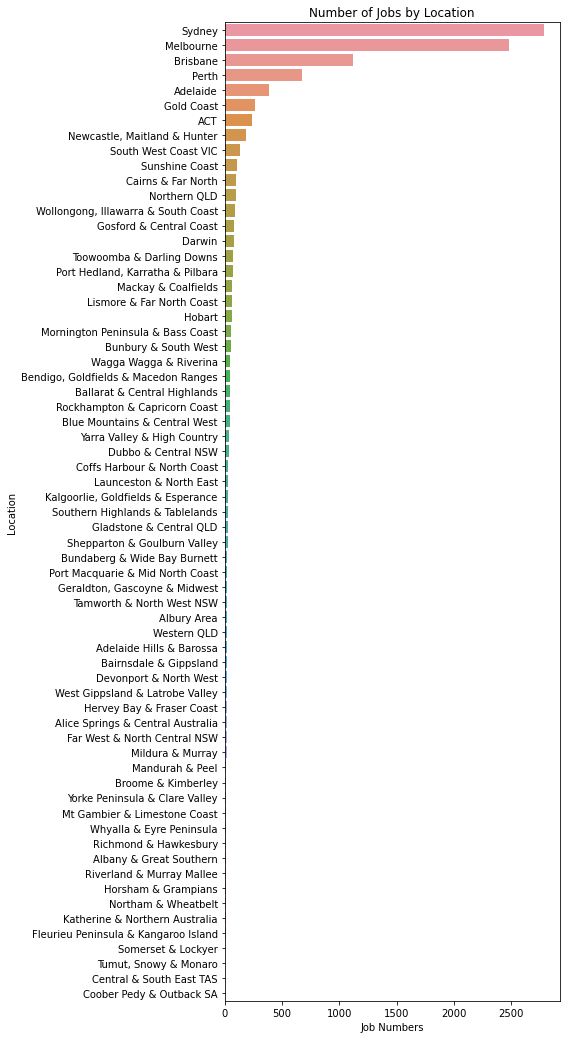

In [40]:
plt.rcParams["figure.figsize"] = (6,18)
ax = sns.barplot(x="Job", y="Location", data=df_jb_loc)
ax.set(xlabel='Job Numbers', ylabel='Location')
ax.set_title("Number of Jobs by Location")
plt.show()

In [43]:
df_job['HighestSalary'].describe()

count    10099.000000
mean        42.290326
std         11.458869
min         30.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         60.000000
Name: HighestSalary, dtype: float64

In [44]:
df_job['LowestSalary'].describe()

count    10099.000000
mean        24.578671
std         20.387614
min          0.000000
25%          0.000000
50%         30.000000
75%         40.000000
max         50.000000
Name: LowestSalary, dtype: float64

In [46]:
jog_gb = df_job.groupby(['HighestSalary', 'LowestSalary'])

In [48]:
jog_gb.size()

HighestSalary  LowestSalary
30.0           0.0             3894
40.0           30.0            1842
50.0           40.0            2519
60.0           50.0            1844
dtype: int64

In [75]:
df_jb_gp = pd.DataFrame(jog_gb.size())

In [76]:
df_jb_gp = df_jb_gp.reset_index()
df_jb_gp.columns = ['HighestSalary', 'LowestSalary', 'Job Numbers']
df_jb_gp.head()

HighestSalary  LowestSalary  Job Numbers
0           30.0           0.0         3894
1           40.0          30.0         1842
2           50.0          40.0         2519
3           60.0          50.0         1844

#### - Job posts by salary range

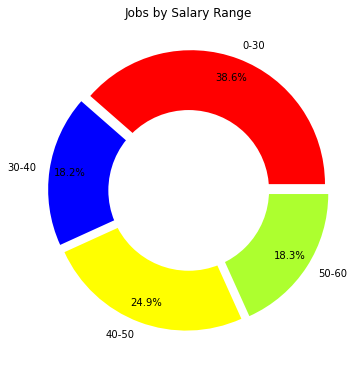

In [84]:
# Setting labels for items in Chart
SalaryRange = ['0-30', '30-40', '40-50',
            '50-60']
  
# Setting size in Chart based on 
# given values
JobNumbers = df_jb_gp['Job Numbers']
  
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F']
# explosion
explode = (0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(JobNumbers, colors=colors, labels=SalaryRange,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Jobs by Salary Range')
  
# Displaying Chart
plt.show()

#### - Explore other aspects of the dataset

- Explore Job numbers by location in the lowest salary range

In [108]:
df_salary_0_30 = df_job[(df_job['LowestSalary']==0) & (df_job['HighestSalary']==30)]

In [109]:
jb_loc_0_30 = df_salary_0_30['Location'].value_counts()
df_jb_loc_0_30 = pd.DataFrame(jb_loc_0_30)
df_jb_loc_0_30 = df_jb_loc_0_30.reset_index()

In [111]:
df_jb_loc_0_30.columns = ['Location', 'Job Number']
df_jb_loc_0_30.head()

Location  Job Number
0     Sydney        1232
1  Melbourne         968
2   Brisbane         379
3      Perth         328
4   Adelaide         134

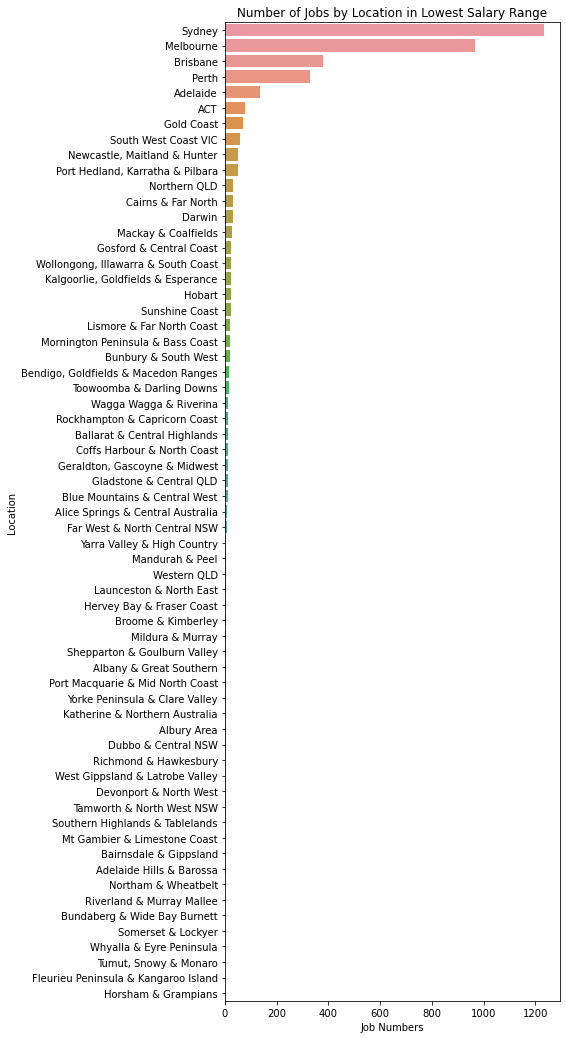

In [113]:
plt.rcParams["figure.figsize"] = (6,18)
ax = sns.barplot(x="Job Number", y="Location", data=df_jb_loc_0_30)
ax.set(xlabel='Job Numbers', ylabel='Location')
ax.set_title("Number of Jobs by Location in Lowest Salary Range")
plt.show()

- Explore Job numbers by classification in the lowest salary range

In [122]:
jb_class_0_30 = df_salary_0_30['Classification'].value_counts()
df_jb_class_0_30 = pd.DataFrame(jb_class_0_30)
df_jb_class_0_30 = df_jb_class_0_30.reset_index()

In [123]:
df_jb_class_0_30.columns = ['Classification', 'Job Number']
df_jb_class_0_30.head()
df_jb_class_0_30.head()

Classification  Job Number
0                   Hospitality & Tourism         458
1                       Trades & Services         431
2  Information & Communication Technology         307
3                    Healthcare & Medical         278
4    Manufacturing, Transport & Logistics         275

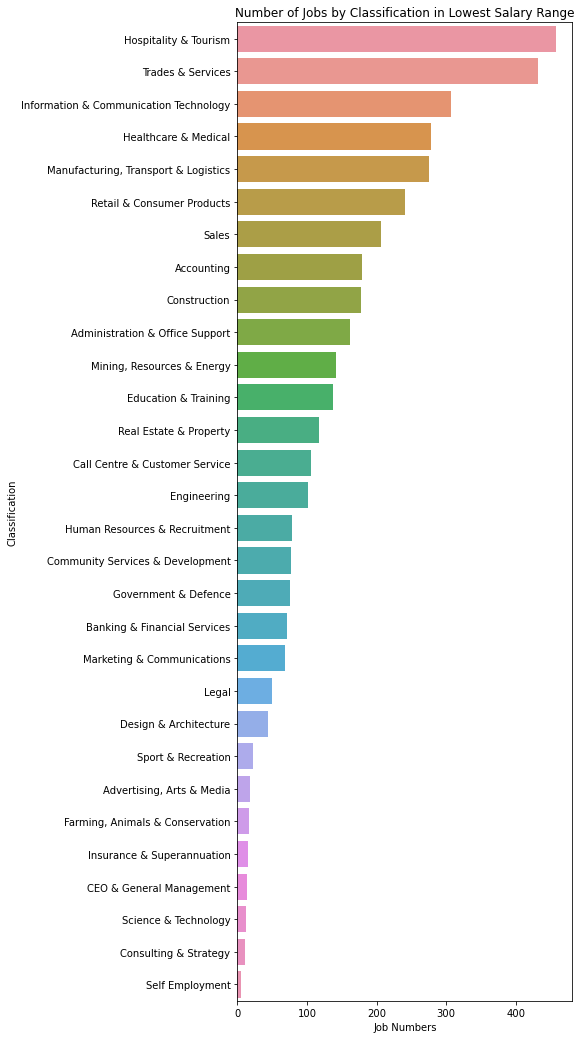

In [124]:
plt.rcParams["figure.figsize"] = (6,18)
ax = sns.barplot(x="Job Number", y="Classification", data=df_jb_class_0_30)
ax.set(xlabel='Job Numbers', ylabel='Classification')
ax.set_title("Number of Jobs by Classification in Lowest Salary Range")
plt.show()

- Explore Job numbers by location in the highest salary range

In [115]:
df_salary_50_60 = df_job[(df_job['LowestSalary']==50) & (df_job['HighestSalary']==60)]
jb_loc_50_60 = df_salary_50_60['Location'].value_counts()
df_jb_loc_50_60 = pd.DataFrame(jb_loc_50_60)
df_jb_loc_50_60 = df_jb_loc_50_60.reset_index()

In [116]:
df_jb_loc_50_60.columns = ['Location', 'Job Number']
df_jb_loc_50_60.head()

Location  Job Number
0     Sydney         545
1  Melbourne         473
2   Brisbane         229
3      Perth         102
4   Adelaide          71

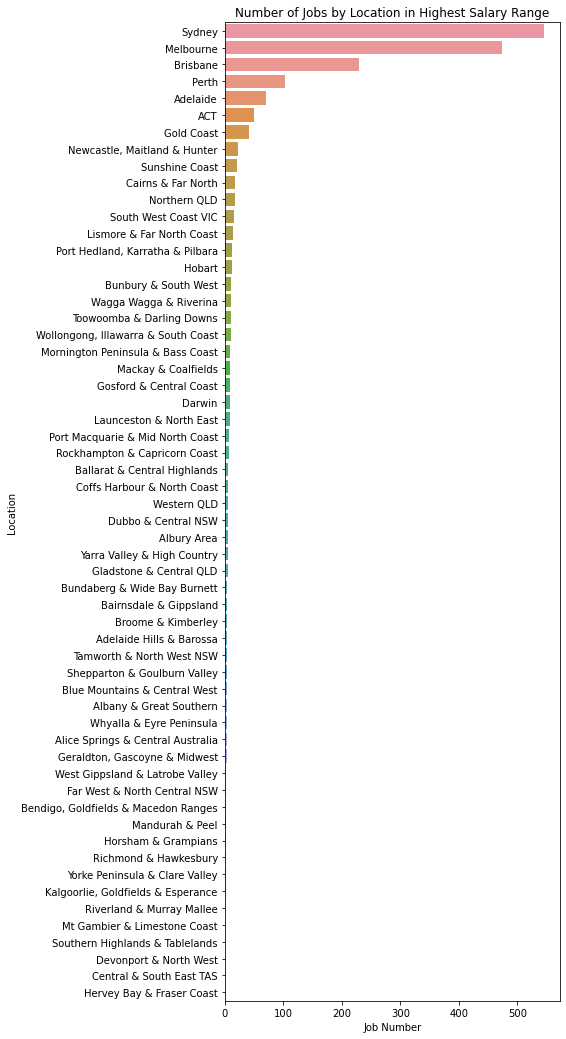

In [117]:
plt.rcParams["figure.figsize"] = (6,18)
ax = sns.barplot(x="Job Number", y="Location", data=df_jb_loc_50_60)
ax.set(xlabel='Job Number', ylabel='Location')
ax.set_title("Number of Jobs by Location in Highest Salary Range")
plt.show()

- Explore Job numbers by classification in the highest salary range

In [125]:
jb_class_50_60 = df_salary_50_60['Classification'].value_counts()
df_jb_class_50_60 = pd.DataFrame(jb_class_50_60)
df_jb_class_50_60 = df_jb_class_50_60.reset_index()

In [126]:
df_jb_class_50_60.columns = ['Classification', 'Job Number']
df_jb_class_50_60.head()

Classification  Job Number
0  Manufacturing, Transport & Logistics         269
1                     Trades & Services         223
2       Administration & Office Support         180
3                 Hospitality & Tourism         161
4            Retail & Consumer Products         131

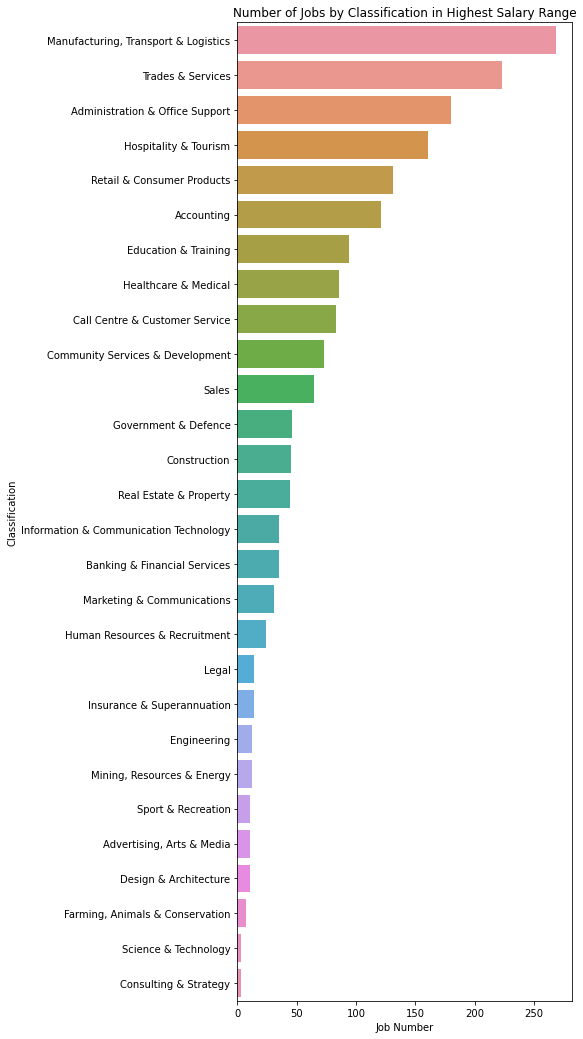

In [127]:
plt.rcParams["figure.figsize"] = (6,18)
ax = sns.barplot(x="Job Number", y="Classification", data=df_jb_class_50_60)
ax.set(xlabel='Job Number', ylabel='Classification')
ax.set_title("Number of Jobs by Classification in Highest Salary Range")
plt.show()

- Explore Job numbers by Job Type

In [85]:
df_job['JobType'].value_counts()

Full Time          5858
Casual/Vacation    1551
Contract/Temp      1352
Part Time          1091
Name: JobType, dtype: int64

- Explore Job numbers by Classification

In [104]:
jb_class  = df_job['Classification'].value_counts()
df_jb_class = pd.DataFrame(jb_class)
df_jb_class = df_jb_class.reset_index()


index  Classification
0                 Hospitality & Tourism            1585
1                     Trades & Services            1225
2  Manufacturing, Transport & Logistics             990
3            Retail & Consumer Products             896
4       Administration & Office Support             746

In [105]:
df_jb_class.columns = ['Classification', 'Job Numbers']
df_jb_class.head()

Classification  Job Numbers
0                 Hospitality & Tourism         1585
1                     Trades & Services         1225
2  Manufacturing, Transport & Logistics          990
3            Retail & Consumer Products          896
4       Administration & Office Support          746

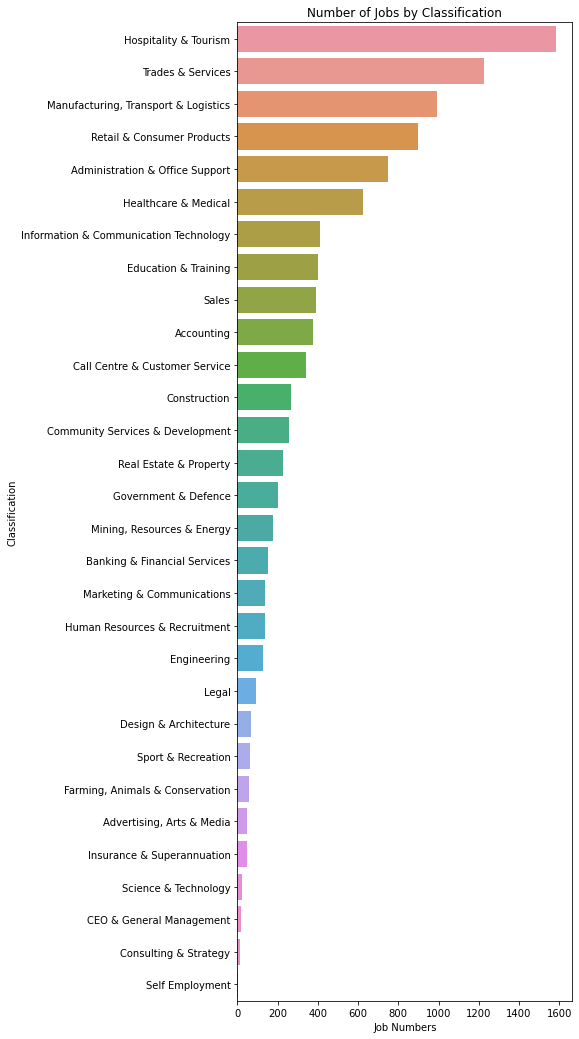

In [106]:
plt.rcParams["figure.figsize"] = (6,18)
ax = sns.barplot(x="Job Numbers", y="Classification", data=df_jb_class)
ax.set(xlabel='Job Numbers', ylabel='Classification')
ax.set_title("Number of Jobs by Classification")
plt.show()

### Data Correlation

- Load data from wine.data.csv and remove labels

In [133]:
df_wine = pd.read_csv('./data/wine.data.csv')
df_wine.head(2)

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   

   Color intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050

In [134]:
df_wine_no_label = df_wine.iloc[:,1:]
df_wine_no_label.head(2)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050

- Use Scatter plot to learn attributes of data 
- Conclusion: It's difficult to find any correlation between two arributes

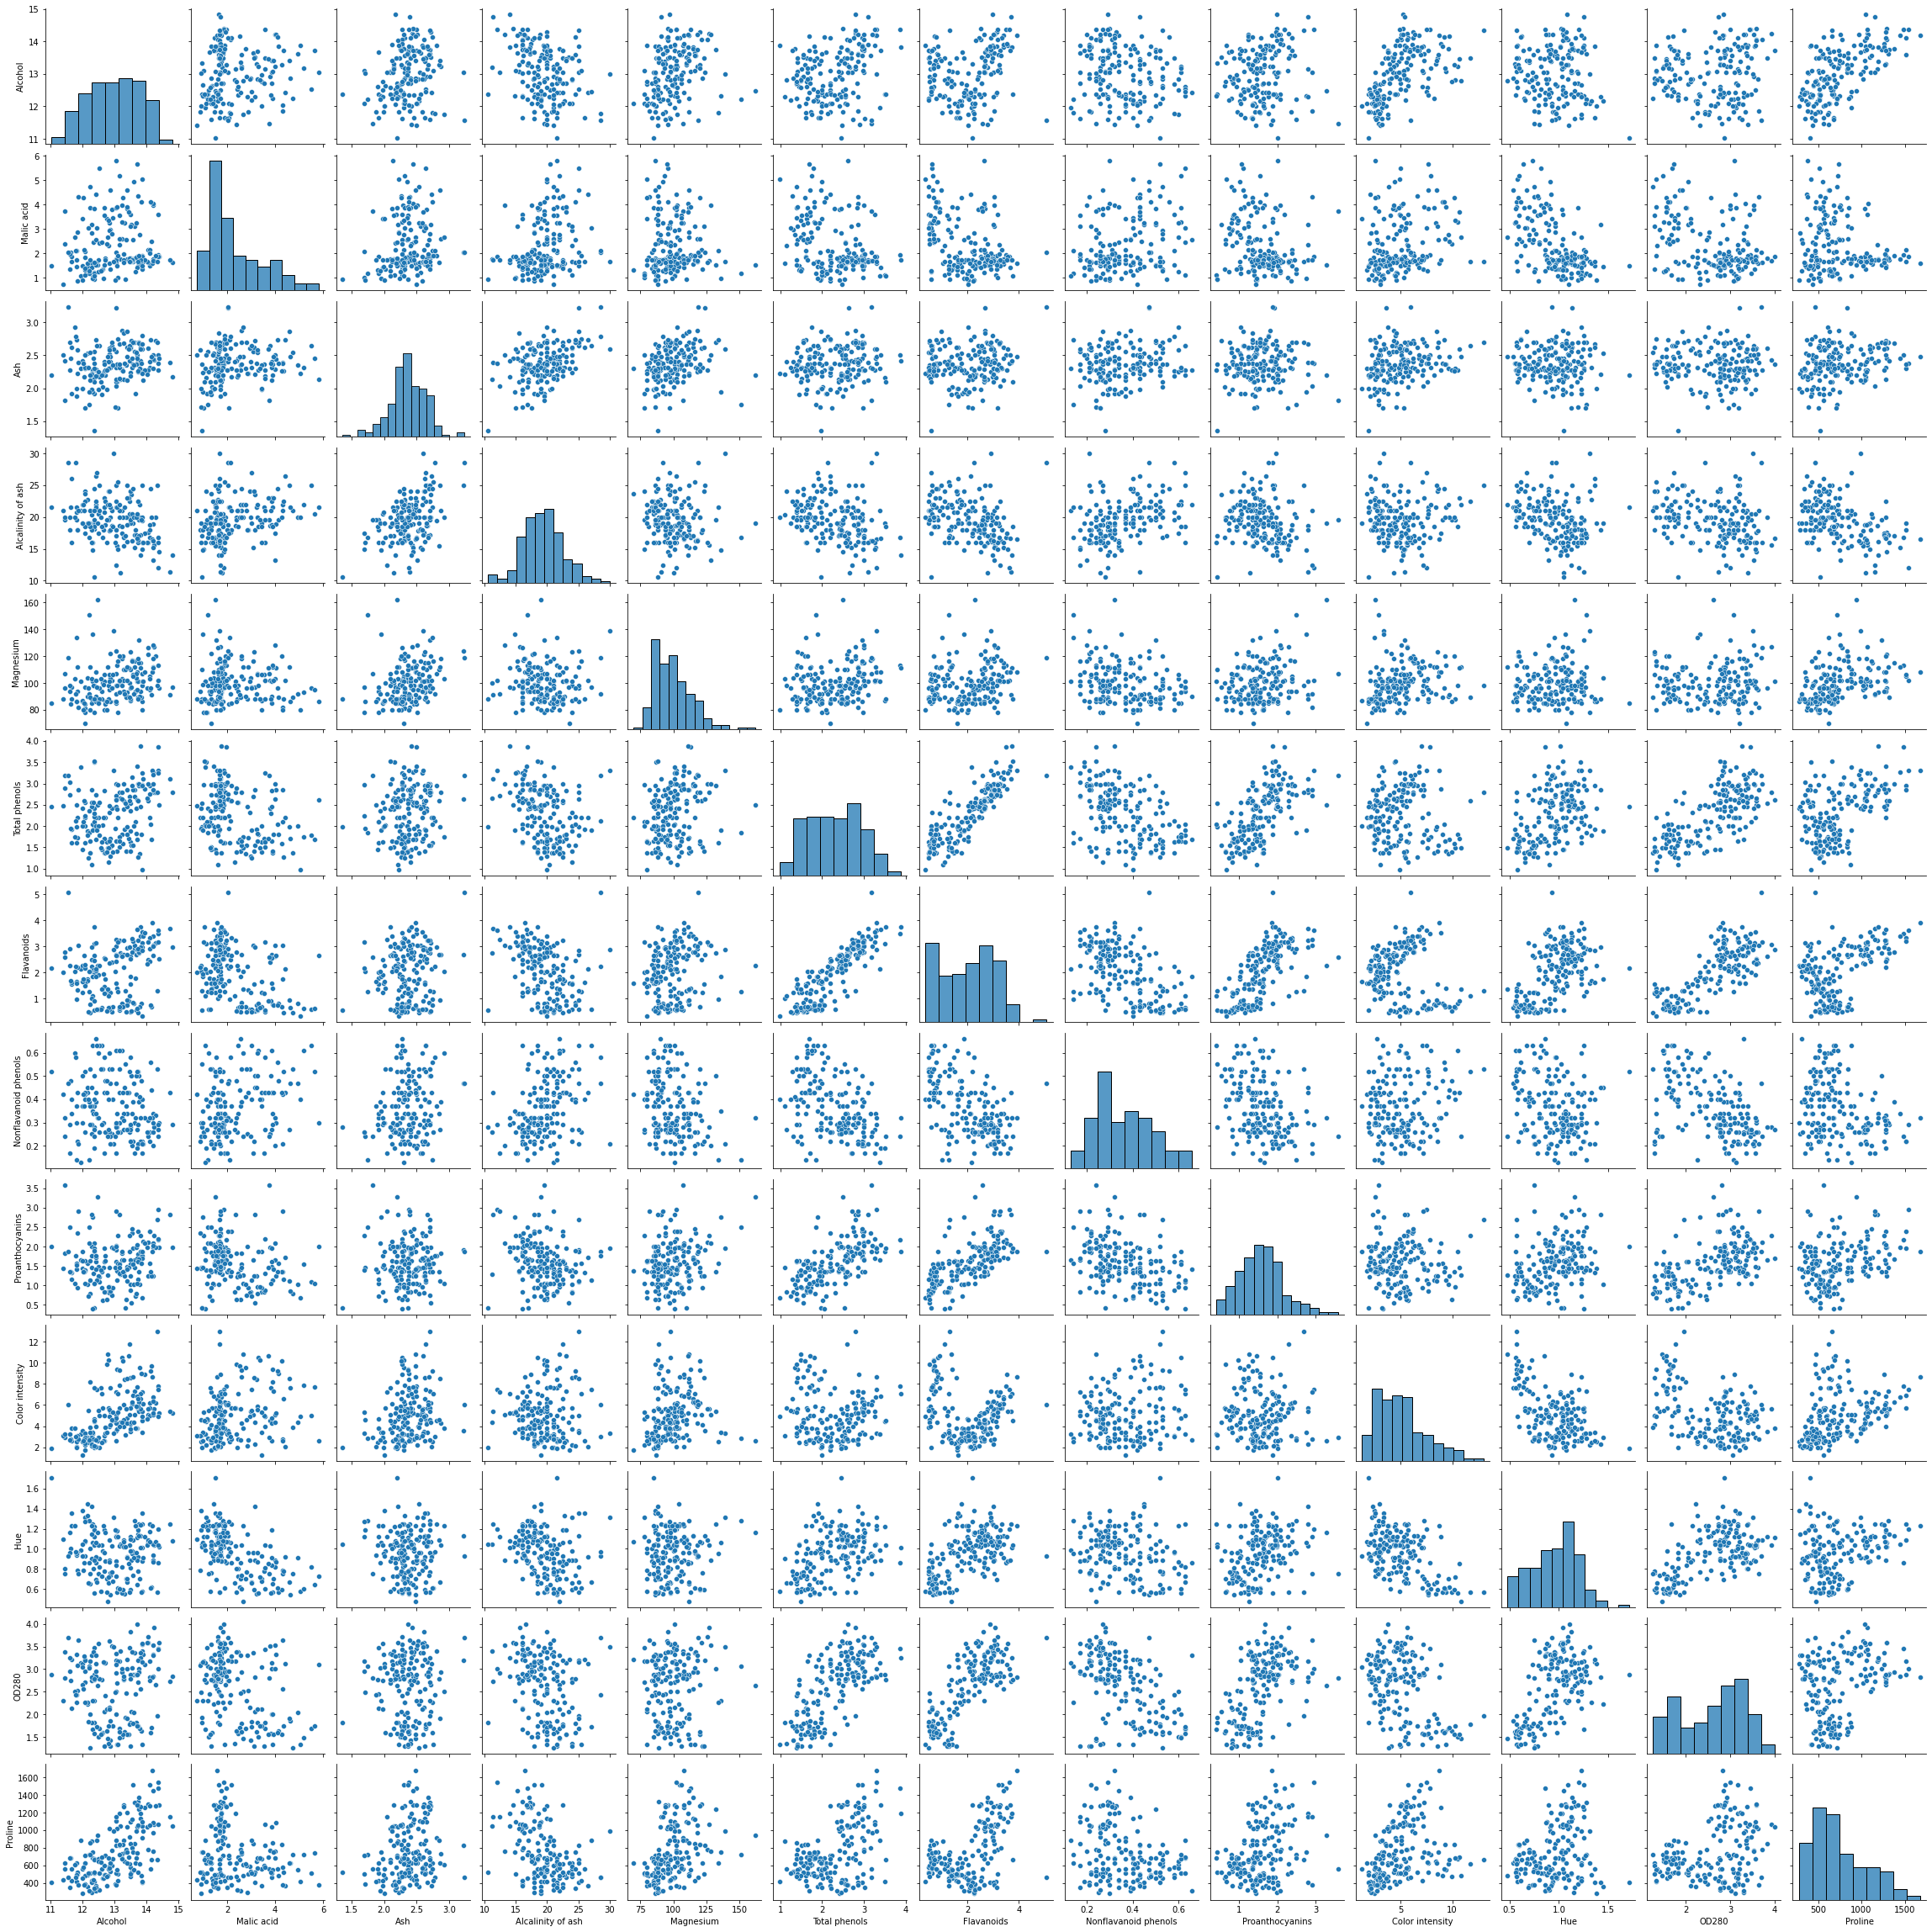

In [136]:
ax_wine = sns.pairplot(df_wine_no_label)

- visualize data with correlation heatmap
- List three pairs of attributes which have the largest correlation
    - 1.(Flavanoids, Total phenols) 0.86
    - 2.(OD280, Flavanoids) 0.79
    - 3.(OD280, Total phenols) 0.70

In [138]:
wine_corr = df_wine_no_label.corr()

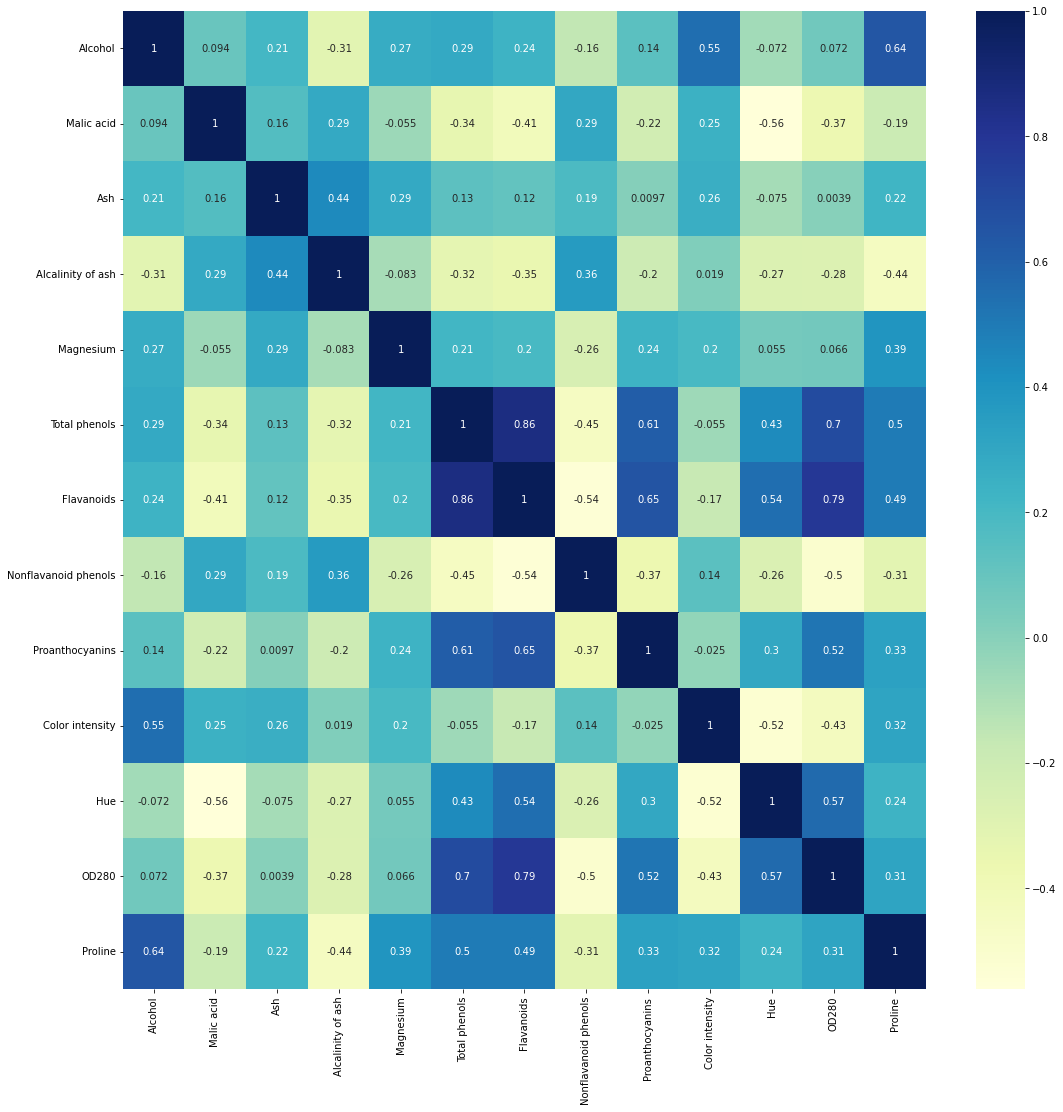

In [141]:
plt.rcParams["figure.figsize"] = (18,18)
ax_wine2 = sns.heatmap(wine_corr,annot=True, cmap="YlGnBu")

- Kmeans k =3 

In [142]:
from sklearn.cluster import KMeans

In [145]:
kmeans = KMeans(n_clusters=3, random_state=0)
res = kmeans.fit_predict(df_wine_no_label)

In [146]:
res

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [147]:
df_wine_no_label['cluster'] = res.astype('float64')

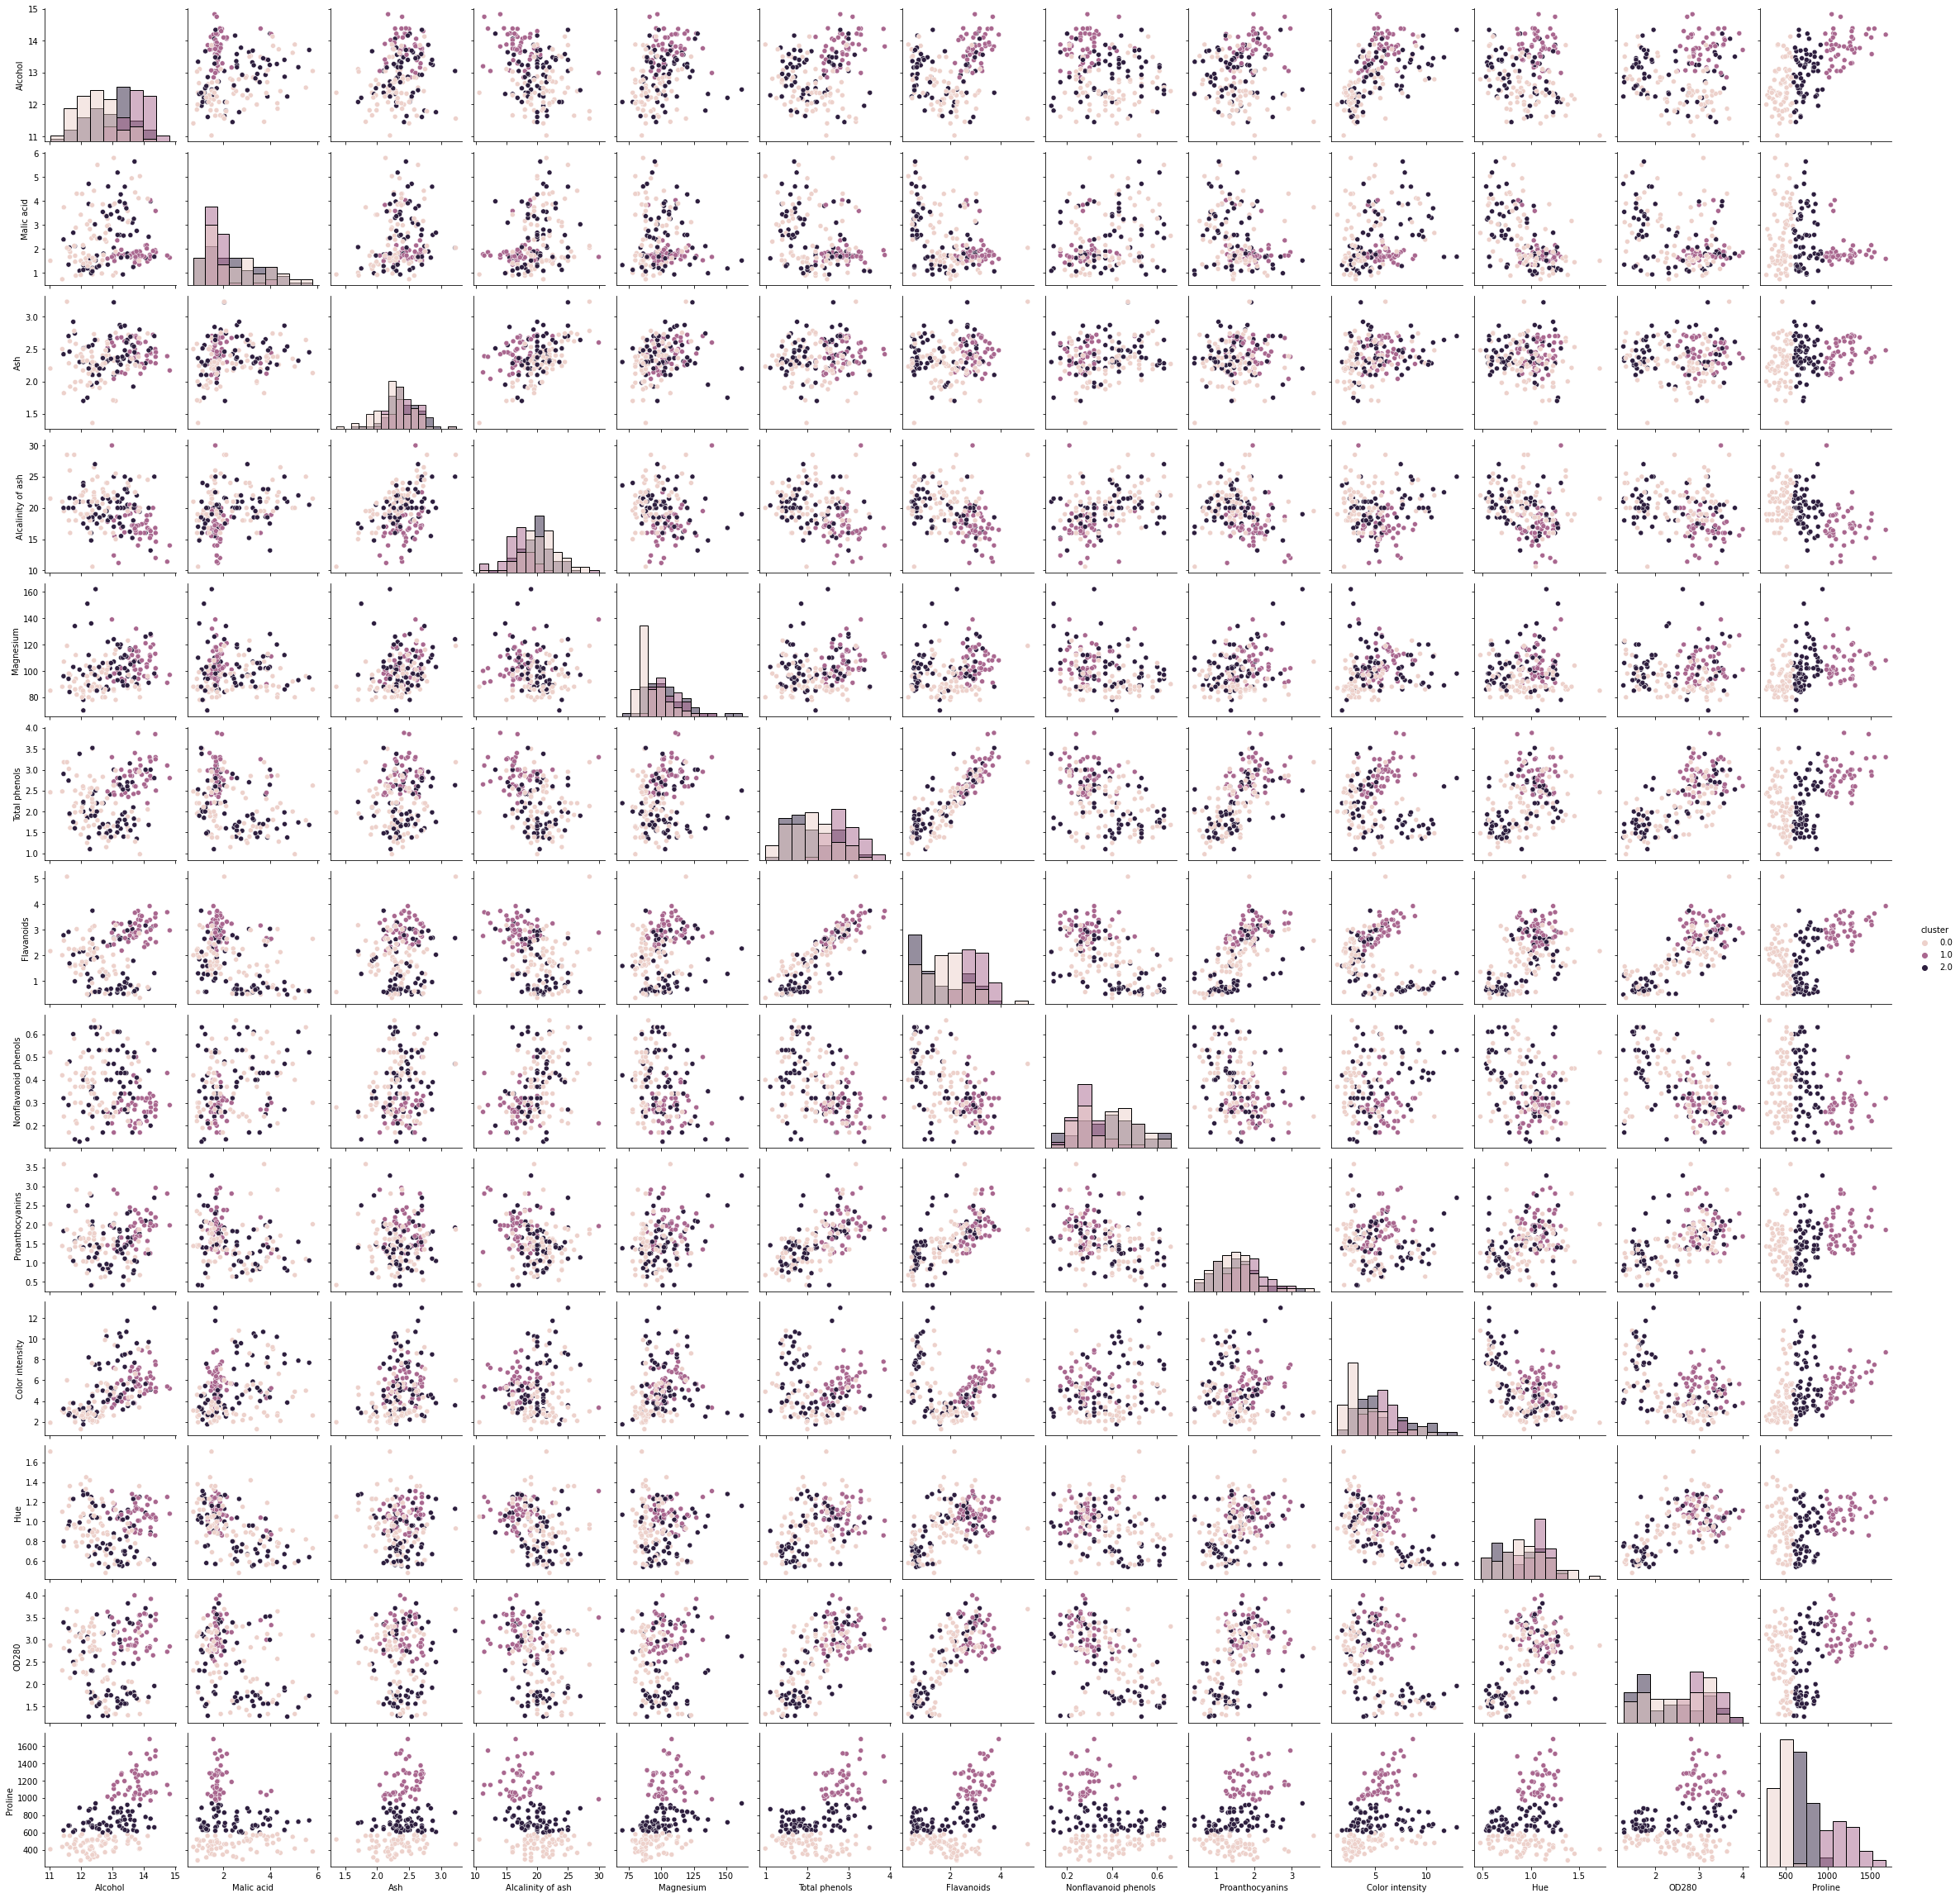

In [148]:
sns_plot = sns.pairplot(df_wine_no_label, hue = "cluster",diag_kind="hist")

- Normalize data

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
standardScaler = StandardScaler()
standardScaler.fit(df_wine_no_label)
X_scaled_array = standardScaler.transform(df_wine_no_label)
normalizedData = pd.DataFrame(X_scaled_array, columns = df_wine_no_label.columns)
normalizedData.head(2)

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   

   Color intensity       Hue     OD280   Proline   cluster  
0         0.251717  0.362177  1.847920  1.013009  0.045889  
1        -0.293321  0.406051  1.113449  0.965242  0.045889

- PCA + Kmeans

In [151]:
from sklearn.decomposition import PCA

In [157]:
pca = PCA(n_components=6)
pca.fit(normalizedData)
wine_reduced = pca.transform(normalizedData)

In [158]:
kmeans = KMeans(n_clusters=3, random_state=0)
res_reduced = kmeans.fit_predict(wine_reduced)

In [159]:
df_wine_reduced = pd.DataFrame(wine_reduced)
df_wine_reduced['cluster'] = res_reduced.astype('float64')
df_wine_reduced.head()

0         1         2         3         4         5  cluster
0  3.335226 -1.306291 -0.089418  0.036568  0.451204  0.599412      0.0
1  2.207896  0.304065 -2.035146 -0.018577 -0.370566  0.421076      0.0
2  2.527546 -0.882659  1.062437  0.664917  0.095408 -0.759560      0.0
3  3.788913 -2.480571  0.025916  1.206886 -0.156455  0.189116      0.0
4  1.072794 -1.181786  1.926913 -1.016708  0.209499 -0.197571      0.0

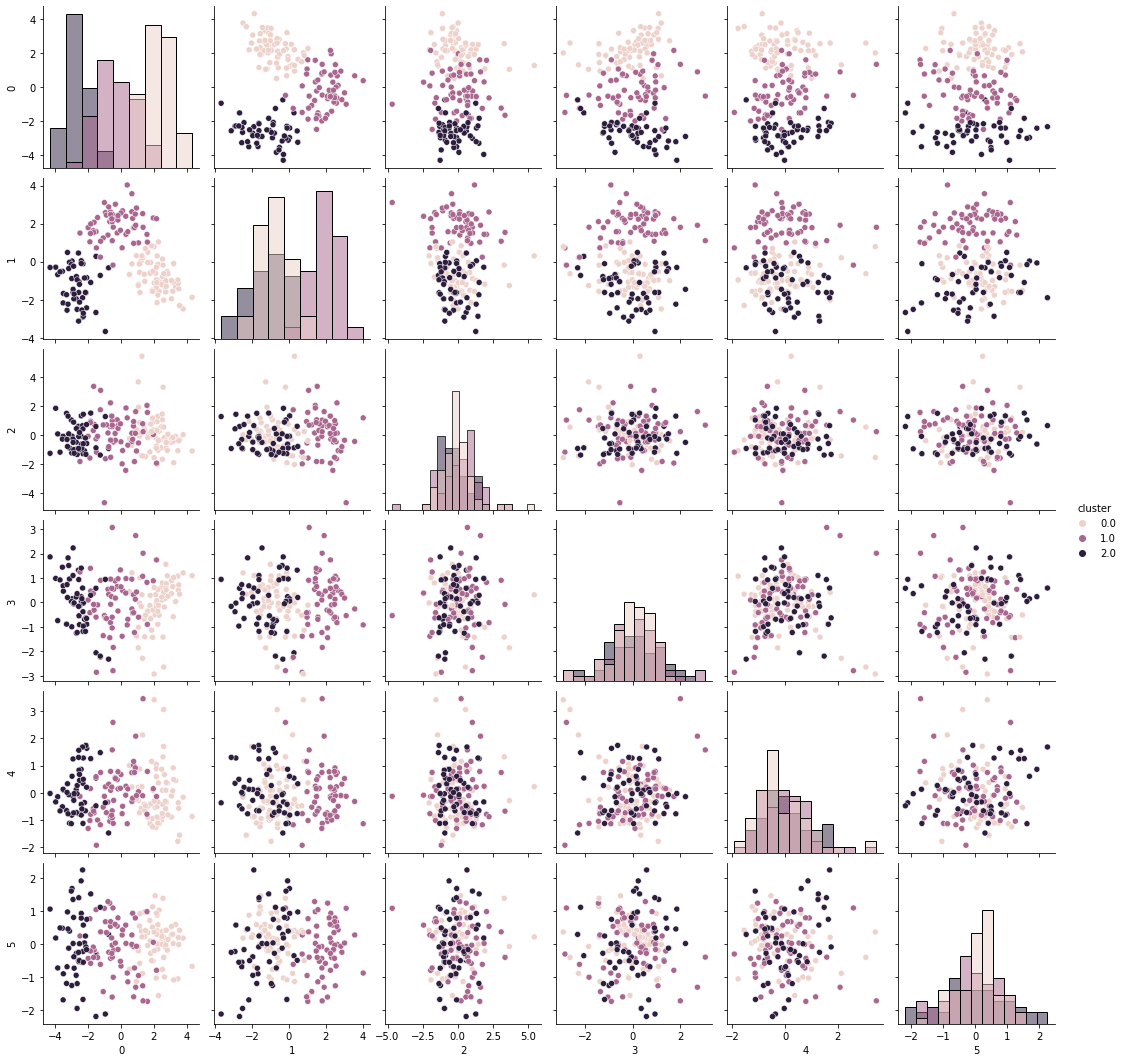

In [160]:
sns_plot2= sns.pairplot(df_wine_reduced, hue = "cluster",diag_kind="hist")

- Adjusted rannd score

In [161]:
from sklearn.metrics.cluster import adjusted_rand_score

In [162]:
adj_score = adjusted_rand_score(res, res_reduced) 
print(adj_score)

0.3776770067781876


- Conclusion:
    - Clusters are more obviously showned after PCA dimension reduction
    - The 6 PCA reduced dimension represent the correlation among data more than the original attributes